# Question 1

## Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, auc, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

weather = pd.read_csv('weather.csv')

weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [3]:
#Preporocess the data 

#Check which columns have missing data
print(weather.mean_temp.isna().sum())
print(weather.date.isna().sum())
print(weather.cloud_cover.isna().sum())
print(weather.sunshine.isna().sum())
print(weather.global_radiation.isna().sum())
print(weather.precipitation.isna().sum())
print(weather.pressure.isna().sum())
print(weather.snow_depth.isna().sum())




36
0
19
0
19
6
4
1441


In [4]:
#Replaces all the missing data with the mean of that column.
columns = weather.columns
print(columns)

for col in columns:
    mean_val = weather[col].mean()
    print(mean_val)
    weather[col].fillna(mean_val, inplace = True)
    print(weather[col].isna().sum())

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')
19995671.59344241
0
5.268241743897663
0
4.350237924515966
0
118.75695078971414
0
15.388777306814523
0
11.475511270826521
0
7.559867005671808
0
1.6686338441474187
0
101536.6055943144
0
0.03798561151079137
0


In [5]:
#Define x and y 

#Predictor variables 
x = weather.drop(['max_temp', 'mean_temp', 'min_temp'], axis = 1)
print(x)
print(len(x))

#Target Variable
y = weather['mean_temp']
print(y)
print(len(y))

           date  cloud_cover  sunshine  global_radiation  precipitation  \
0      19790101          2.0       7.0              52.0            0.4   
1      19790102          6.0       1.7              27.0            0.0   
2      19790103          5.0       0.0              13.0            0.0   
3      19790104          8.0       0.0              13.0            0.0   
4      19790105          6.0       2.0              29.0            0.0   
...         ...          ...       ...               ...            ...   
15336  20201227          1.0       0.9              32.0            2.0   
15337  20201228          7.0       3.7              38.0            0.2   
15338  20201229          7.0       0.0              21.0            0.0   
15339  20201230          6.0       0.4              22.0            0.0   
15340  20201231          7.0       1.3              34.0            0.0   

       pressure  snow_depth  
0      101900.0    9.000000  
1      102530.0    8.000000  
2      10

In [6]:
#Splitting dataset into 80% trainign data set and 20% testing data set

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
y_predict = lr.predict(X_test)
print(y_predict)

[17.5739703   9.5185618  18.77472665 ...  7.12451646  7.76756083
 11.37245446]


In [9]:
#Evaluating the model 
from sklearn.metrics import r2_score, mean_squared_error

y_pred1 = lr.predict(X_train)
mse1 = mean_squared_error(y_train, y_pred1)

mse2 = mean_squared_error(y_test, y_predict)

print("The mean squared error for training data is " + str(mse1))
print("The mean squared error for testing data is " + str(mse2))

r2_test = r2_score(y_test, y_predict)
r2_train = r2_score(y_train, y_pred1)

print(r2_test)
print(r2_train)

The mean squared error for training data is 16.45684525828288
The mean squared error for testing data is 16.270843106473983
0.5018007248502101
0.4978408044727747


<function matplotlib.pyplot.show(close=None, block=None)>

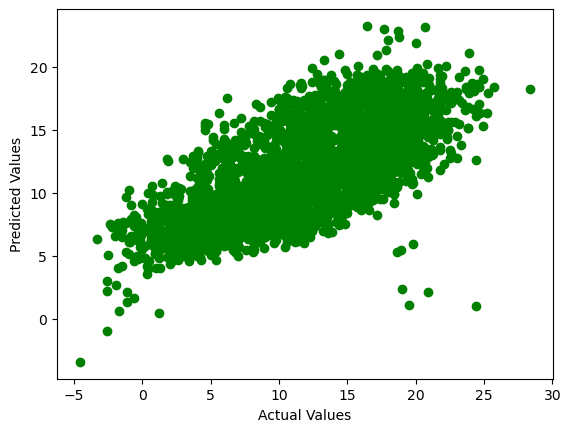

In [10]:
#Plot actual vs predicted values
plt.scatter(y_test, y_predict, color = 'green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show

## Gradient Descent

In [11]:
new_weather = weather.dropna()
X2 = new_weather[['sunshine', 'cloud_cover', 'precipitation']]
y2 = new_weather['max_temp']

In [12]:
#split data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [13]:
eta = 0.01
num_iterations = 1000
w = np.zeros(X2_train.shape[1])

#loop to perform gradient descent
for i in range(num_iterations):
    # Calculate the predicted values
    y2_pred = np.dot(X2_train, w)
    
    # Calculate cost function
    gradient = (1/len(y2_train)) * np.dot(X2_train.T, (y2_pred - y2_train))
    
    # Update the parameters using the gradient
    w = w - eta * gradient

In [14]:
#Parameter of model
print("Intercept ", w[0], "Slope: ", w[1])

Intercept  1.4597686858975245 Slope:  1.667376852087982


In [15]:
# pred with test data
y2_pred = np.dot(X2_test, w)
y2_pred

array([21.24447999, 13.6701569 , 13.77694542, ..., 11.67163796,
       11.69744124, 10.75685973])

In [16]:
#evaluate performance
mse = mean_squared_error(y2_test, y2_pred)
r2_gd = r2_score(y2_test, y2_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2_gd)

Mean Squared Error: 32.45014716643381
R-squared: 0.23719902258165682


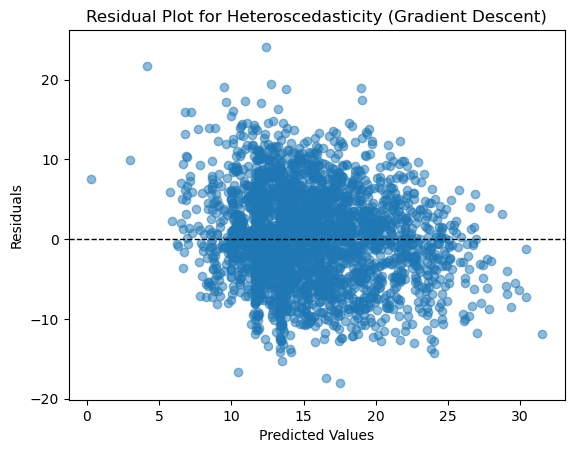

In [17]:
# Create a scatter plot of residuals against predicted values
residuals_gd = y2_test - y2_pred
plt.scatter(y2_pred, residuals_gd, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Heteroscedasticity (Gradient Descent)')
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.show()

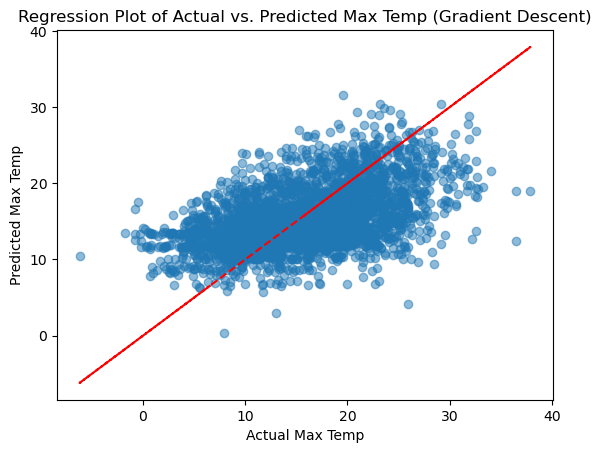

In [18]:
# Scatter plot of actual vs. predicted values
plt.scatter(y2_test, y2_pred, alpha=0.5)
plt.plot(y2_test, y2_test, linestyle='--', color='r')
plt.title("Regression Plot of Actual vs. Predicted Max Temp (Gradient Descent)")
plt.xlabel("Actual Max Temp")
plt.ylabel("Predicted Max Temp")
plt.show()

# Question 2

## Binary Classification:

In [19]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15341 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15341 non-null  float64
 4   max_temp          15341 non-null  float64
 5   mean_temp         15341 non-null  float64
 6   min_temp          15341 non-null  float64
 7   precipitation     15341 non-null  float64
 8   pressure          15341 non-null  float64
 9   snow_depth        15341 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [20]:
new_weather = weather.dropna()
new_weather.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,1.534100e+04,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000
mean,1.999567e+07,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
std,1.212176e+05,2.068790,4.028339,88.843200,6.553472,5.722981,5.326409,3.737809,1049.585735,0.519373
min,1.979010e+07,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,1.989070e+07,4.000000,0.500000,41.000000,10.500000,7.100000,3.500000,0.000000,100920.000000,0.000000
50%,2.000010e+07,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,2.010070e+07,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,2.020123e+07,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


In [21]:
new_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15341 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15341 non-null  float64
 4   max_temp          15341 non-null  float64
 5   mean_temp         15341 non-null  float64
 6   min_temp          15341 non-null  float64
 7   precipitation     15341 non-null  float64
 8   pressure          15341 non-null  float64
 9   snow_depth        15341 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [22]:
new_weather['date'] = pd.to_datetime(new_weather['date'], format = '%Y%m%d')
new_weather['month'] = new_weather['date'].dt.strftime('%B')
new_weather = pd.get_dummies(new_weather)
new_weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,...,0,0,1,0,0,0,0,0,0,0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,...,0,0,1,0,0,0,0,0,0,0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,...,0,0,1,0,0,0,0,0,0,0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,...,0,0,1,0,0,0,0,0,0,0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [23]:
new_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       15341 non-null  float64       
 2   sunshine          15341 non-null  float64       
 3   global_radiation  15341 non-null  float64       
 4   max_temp          15341 non-null  float64       
 5   mean_temp         15341 non-null  float64       
 6   min_temp          15341 non-null  float64       
 7   precipitation     15341 non-null  float64       
 8   pressure          15341 non-null  float64       
 9   snow_depth        15341 non-null  float64       
 10  month_April       15341 non-null  uint8         
 11  month_August      15341 non-null  uint8         
 12  month_December    15341 non-null  uint8         
 13  month_February    15341 non-null  uint8         
 14  month_January     1534

In [24]:
new_weather.corr()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,month_April,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
cloud_cover,1.000000,-0.737884,-0.484820,-0.211913,-0.110273,0.048763,0.235058,-0.241651,-0.001185,-0.041198,...,0.059369,0.050051,0.060974,-0.044576,-0.008950,0.031999,-0.034061,0.034615,0.006334,-0.055856
sunshine,-0.737884,1.000000,0.849974,0.472112,0.396130,0.219076,-0.231602,0.226924,-0.032330,0.092613,...,-0.202973,-0.120787,-0.183422,0.172313,0.154503,-0.047655,0.152269,-0.153571,-0.058414,0.046000
global_radiation,-0.484820,0.849974,1.000000,0.689729,0.633862,0.477701,-0.162590,0.150027,-0.058045,0.152547,...,-0.325825,-0.213919,-0.304094,0.319325,0.313360,-0.060019,0.289160,-0.271533,-0.155486,0.022328
max_temp,-0.211913,0.472112,0.689729,1.000000,0.911442,0.810284,-0.071798,0.100419,-0.123654,-0.034831,...,-0.308773,-0.300521,-0.340625,0.386075,0.264982,-0.181436,0.128048,-0.195302,0.008266,0.208416
mean_temp,-0.110273,0.396130,0.633862,0.911442,1.000000,0.954532,-0.010455,0.004758,-0.147051,-0.071910,...,-0.294759,-0.306455,-0.335429,0.389211,0.260102,-0.205118,0.101960,-0.174502,0.035206,0.222167
min_temp,0.048763,0.219076,0.477701,0.810284,0.954532,1.000000,0.037229,-0.074259,-0.150163,-0.107326,...,-0.255825,-0.288424,-0.302989,0.364965,0.236201,-0.212907,0.069737,-0.142410,0.058606,0.217696
precipitation,0.235058,-0.231602,-0.162590,-0.071798,-0.010455,0.037229,1.000000,-0.349362,-0.001284,-0.020096,...,0.015941,-0.013642,0.014602,-0.017409,-0.003716,-0.021814,-0.008406,0.024678,0.042587,-0.011521
pressure,-0.241651,0.226924,0.150027,0.100419,0.004758,-0.074259,-0.349362,1.000000,-0.020531,-0.017572,...,-0.011953,0.024766,0.015693,0.018506,0.026449,-0.006641,0.009110,-0.046001,-0.044094,0.028087
snow_depth,-0.001185,-0.032330,-0.058045,-0.123654,-0.147051,-0.150163,-0.001284,-0.020531,1.000000,-0.018678,...,0.025664,0.064992,0.080574,-0.018561,-0.018232,-0.017205,-0.018955,-0.021236,-0.020033,-0.018215
month_April,-0.041198,0.092613,0.152547,-0.034831,-0.071910,-0.107326,-0.020096,-0.017572,-0.018678,1.000000,...,-0.091097,-0.086627,-0.091097,-0.091097,-0.089482,-0.091097,-0.091097,-0.089482,-0.091097,-0.089482


<AxesSubplot:>

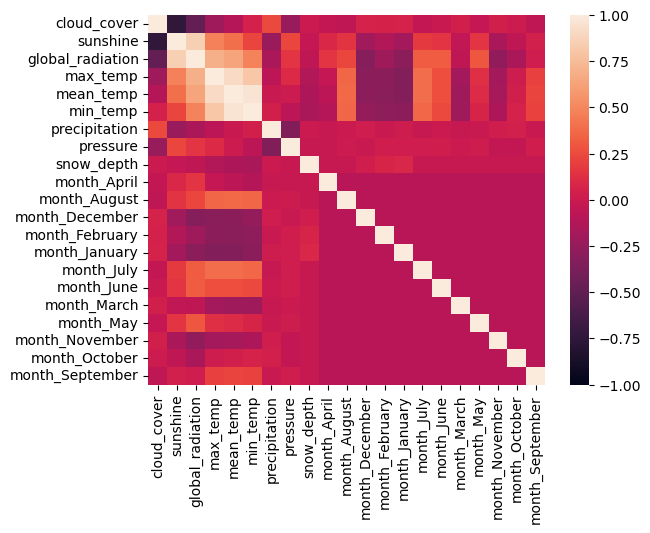

In [25]:
sns.heatmap(new_weather.corr(), vmin = -1, vmax = 1)

In [26]:
new_weather['mean_temp'].agg(['min', 'max'])

min    -7.6
max    29.0
Name: mean_temp, dtype: float64

In [27]:
new_weather.loc[new_weather['mean_temp'] > 10.8, 'mean_temp_category'] = 1
new_weather.loc[new_weather['mean_temp'] <= 10.8, 'mean_temp_category'] = 0

In [28]:
new_weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,...,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,mean_temp_category
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,...,0,1,0,0,0,0,0,0,0,0.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,...,0,1,0,0,0,0,0,0,0,0.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,...,0,1,0,0,0,0,0,0,0,0.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,...,0,1,0,0,0,0,0,0,0,0.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,...,0,1,0,0,0,0,0,0,0,0.0


In [29]:
X = new_weather[['cloud_cover', 'global_radiation', 'precipitation', 'pressure', 'snow_depth', 'month_January', 'month_February', 'month_March', 'month_April', 'month_May', 'month_June', 'month_July', 'month_August', 'month_September', 'month_October', 'month_November', 'month_December']]
y = new_weather['mean_temp_category']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8012381883349625

In [32]:
binary_model = LogisticRegression(max_iter=1000)
binary_model.fit(X_train, y_train)
binary_predictions = binary_model.predict(X_test)
binary_accuracy = accuracy_score(y_test, binary_predictions)
binary_classification_report = classification_report(y_test, binary_predictions)
print("Binary Classification Report:\n", binary_classification_report)
print("Binary Accuracy:", binary_accuracy)

Binary Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.79      0.76      1454
         1.0       0.80      0.73      0.76      1615

    accuracy                           0.76      3069
   macro avg       0.76      0.76      0.76      3069
weighted avg       0.76      0.76      0.76      3069

Binary Accuracy: 0.7588791137178234


In [33]:
y_pred_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")

AUC: 0.88


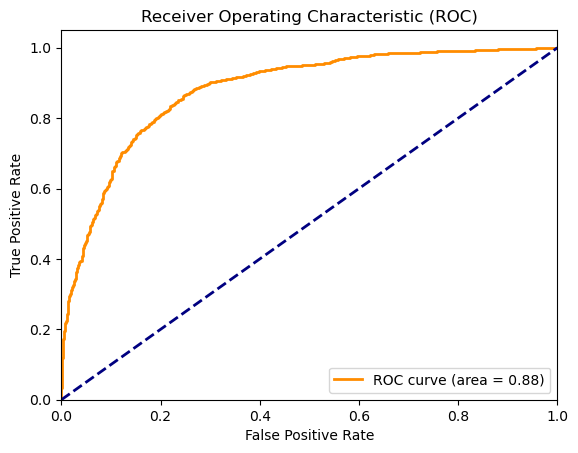

In [34]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Multiclass Classification:

In [35]:
new_weather.loc[new_weather['mean_temp'] >= 16.8, 'mean_temp_cat_multi'] = 'High'
new_weather.loc[(new_weather['mean_temp'] >= 4.6) & (new_weather['mean_temp'] < 16.8), 'mean_temp_cat_multi'] = 'Moderate'
new_weather.loc[new_weather['mean_temp'] < 4.6, 'mean_temp_cat_multi'] = 'Low'

In [36]:
new_weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,...,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,mean_temp_category,mean_temp_cat_multi
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,...,1,0,0,0,0,0,0,0,0.0,Low
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,...,1,0,0,0,0,0,0,0,0.0,Low
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,...,1,0,0,0,0,0,0,0,0.0,Low
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,...,1,0,0,0,0,0,0,0,0.0,Low
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,...,1,0,0,0,0,0,0,0,0.0,Low


In [37]:
new_weather.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth',
       'month_April', 'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September',
       'mean_temp_category', 'mean_temp_cat_multi'],
      dtype='object')

In [38]:
new_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
cloud_cover,15341.0,5.268242,2.068790,0.0,4.0,6.0,7.0,9.0
sunshine,15341.0,4.350238,4.028339,0.0,0.5,3.5,7.2,16.0
global_radiation,15341.0,118.756951,88.843200,8.0,41.0,95.0,186.0,402.0
max_temp,15341.0,15.388777,6.553472,-6.2,10.5,15.0,20.3,37.9
mean_temp,15341.0,11.475511,5.722981,-7.6,7.1,11.4,16.0,29.0
min_temp,15341.0,7.559867,5.326409,-11.8,3.5,7.8,11.8,22.3
precipitation,15341.0,1.668634,3.737809,0.0,0.0,0.0,1.6,61.8
pressure,15341.0,101536.605594,1049.585735,95960.0,100920.0,101620.0,102240.0,104820.0
snow_depth,15341.0,0.037986,0.519373,0.0,0.0,0.0,0.0,22.0
month_April,15341.0,0.082133,0.274576,0.0,0.0,0.0,0.0,1.0


<function matplotlib.pyplot.show(close=None, block=None)>

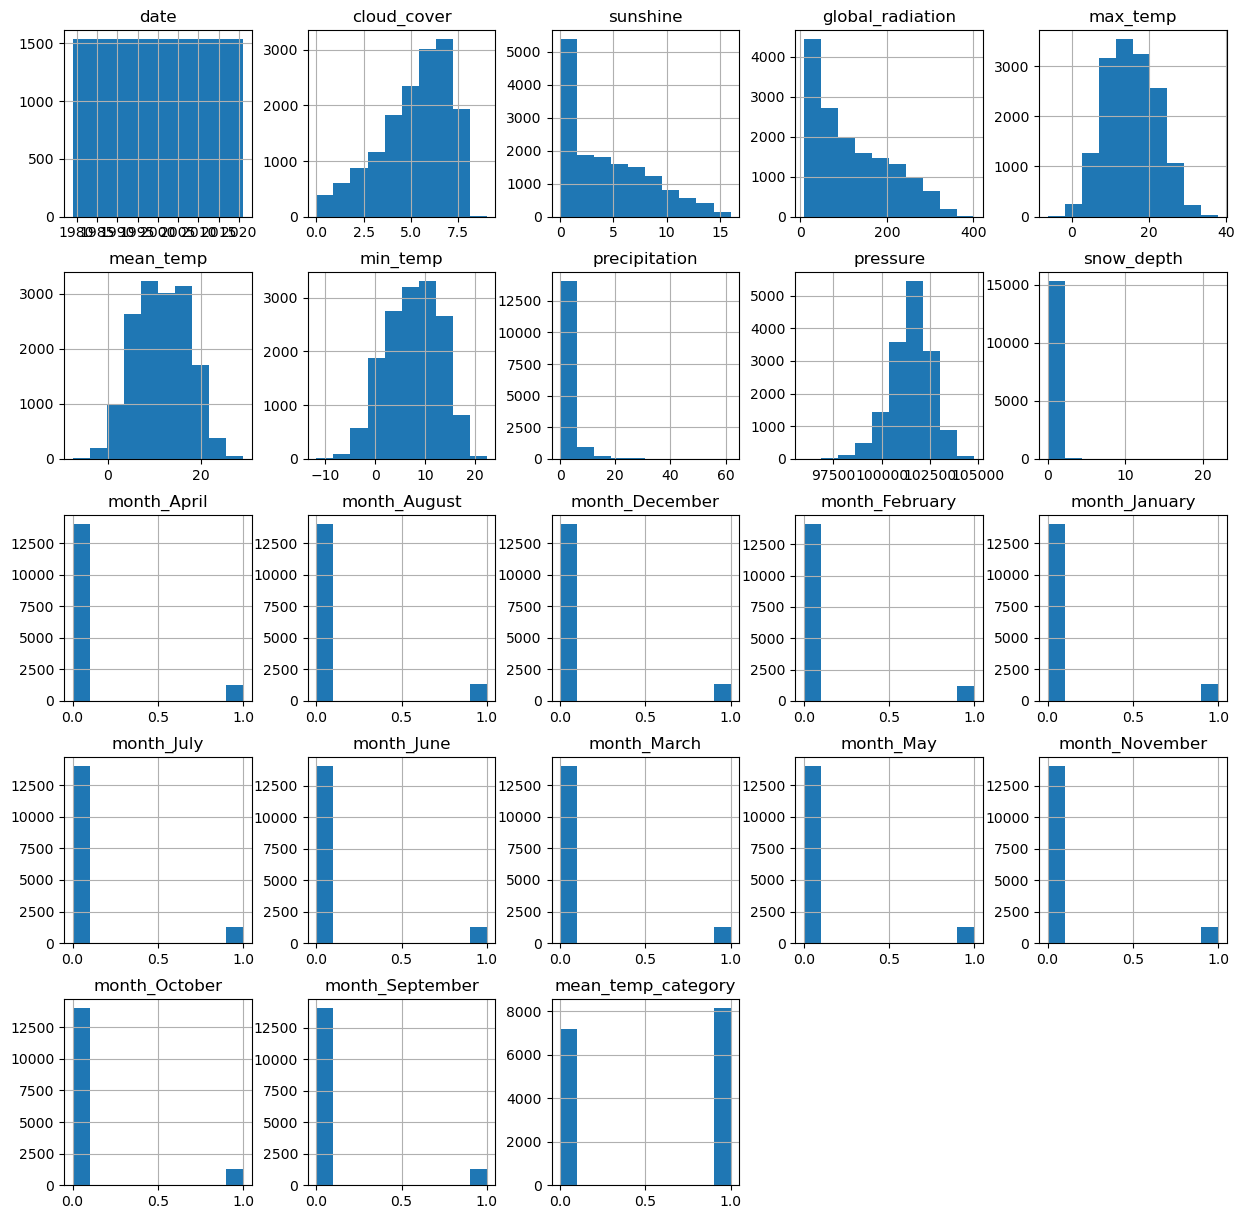

In [39]:
#distribution of data using histogram
new_weather.hist(figsize=(15,15)) 
plt.show

In [40]:
new_weather.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0      False        False     False             False     False      False   
1      False        False     False             False     False      False   
2      False        False     False             False     False      False   
3      False        False     False             False     False      False   
4      False        False     False             False     False      False   
...      ...          ...       ...               ...       ...        ...   
15336  False        False     False             False     False      False   
15337  False        False     False             False     False      False   
15338  False        False     False             False     False      False   
15339  False        False     False             False     False      False   
15340  False        False     False             False     False      False   

 

In [41]:
X = new_weather[['cloud_cover', 'sunshine','global_radiation','snow_depth', 'month_January', 'month_February', 'month_March', 'month_April', 'month_May', 'month_June', 'month_July', 'month_August', 'month_September', 'month_October', 'month_November', 'month_December']]
y = new_weather['mean_temp_cat_multi']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
lr = LogisticRegression(solver="lbfgs", multi_class='auto', max_iter=10000).fit(X_train, y_train) 
print(lr)

LogisticRegression(max_iter=10000)


In [44]:
predictions = lr.predict(X_test)
print('Predicted labels: ', predictions[:15])
print('Actual labels: ', y_test[:15])

Predicted labels:  ['Moderate' 'Moderate' 'Moderate' 'High' 'High' 'Moderate' 'Moderate'
 'Moderate' 'Moderate' 'Low' 'Moderate' 'Moderate' 'Moderate' 'Moderate'
 'Moderate']
Actual labels:  9261     Moderate
5376     Moderate
12578    Moderate
927          High
14109        High
7439     Moderate
7724     Moderate
10269    Moderate
1056     Moderate
13159    Moderate
4643         High
10850    Moderate
5405     Moderate
3995          Low
12179    Moderate
Name: mean_temp_cat_multi, dtype: object


In [45]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        High       0.75      0.70      0.73       633
         Low       0.70      0.24      0.36       369
    Moderate       0.80      0.91      0.85      2067

    accuracy                           0.79      3069
   macro avg       0.75      0.62      0.65      3069
weighted avg       0.78      0.79      0.77      3069



In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print("Overall F1 Score",f1_score(y_test, predictions, average="macro"))

Overall Accuracy: 0.7875529488432714
Overall Precision: 0.7517624728436951
Overall Recall: 0.6180267018233182
Overall F1 Score 0.6460124110887162


In [47]:
#confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[ 444    0  189]
 [   0   89  280]
 [ 145   38 1884]]


array([[ 444,    0,  189],
       [   0,   89,  280],
       [ 145,   38, 1884]], dtype=int64)

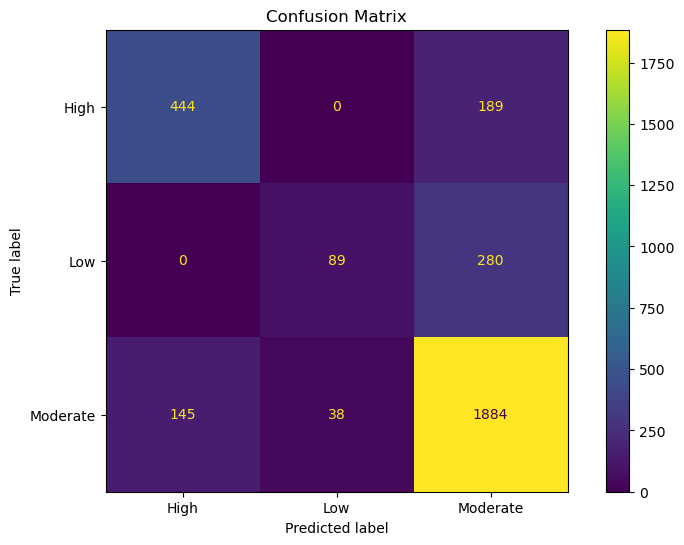

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')

display = metrics.plot_confusion_matrix(lr, X_test, y_test, ax = ax)
display.confusion_matrix

# Question 3

In [60]:
y = weather['mean_temp']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

#Creating a ridge model
from sklearn.metrics import r2_score, mean_squared_error

ridge = Ridge(alpha=1)

ridge.fit(X_scaled, y_train)
new_y = ridge.predict(X_test_scaled)
y_pred = ridge.predict(X_scaled)

r2_test = r2_score(y_test, new_y)
r2_train= r2_score(y_train, y_pred)

mse1 = mean_squared_error(y_test, new_y)
mse2 = mean_squared_error(y_train, y_pred)
print("The mean squared error for the ridge model using test data is " + str(mse1))
print("The mean squared error for the ridge model using train data is " + str(mse2))

print(r2_test)
print(r2_train)

# Do the ridge regression over a range of lambda values
ridge_reg = Ridge(alpha=1, random_state=47)
ridge_reg.fit(X_scaled, y_train)
ridge_coef = []

The mean squared error for the ridge model using test data is 16.23961115045296
The mean squared error for the ridge model using train data is 16.45684702269897
0.5027570205842029
0.497840750633916


In [71]:
#takes values of alpha between 0 and 4, with increments of 0.05
alphas = np.arange(2, 10, 0.25)
print(alphas)
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha, random_state=47)
    ridge_reg.fit(X_scaled, y_train)
    ridge_coef.append(ridge_reg.coef_[0])
    new_y = ridge_reg.predict(X_test_scaled)
    meanSquaredError = mean_squared_error(y_test, new_y)
    print("The mean squared error for the ridge model with alpha =  " + str(ridge_reg.coef_[0]) + " is " + 
          str(meanSquaredError))

    
# reshape the array of w_i values
ridge_coef = np.array(ridge_coef)
ridge_coef

[2.   2.25 2.5  2.75 3.   3.25 3.5  3.75 4.   4.25 4.5  4.75 5.   5.25
 5.5  5.75 6.   6.25 6.5  6.75 7.   7.25 7.5  7.75 8.   8.25 8.5  8.75
 9.   9.25 9.5  9.75]
The mean squared error for the ridge model with alpha =  0.5402815755466506 is 16.240054441510463
The mean squared error for the ridge model with alpha =  0.5402942735063336 is 16.240165688052915
The mean squared error for the ridge model with alpha =  0.5403069551313776 is 16.240277103602413
The mean squared error for the ridge model with alpha =  0.5403196204349101 is 16.240388687907515
The mean squared error for the ridge model with alpha =  0.5403322694300453 is 16.24050044071716
The mean squared error for the ridge model with alpha =  0.5403449021298844 is 16.24061236178067
The mean squared error for the ridge model with alpha =  0.5403575185475148 is 16.240724450847726
The mean squared error for the ridge model with alpha =  0.540370118696013 is 16.2408367076684
The mean squared error for the ridge model with alpha =  

array([0.54028158, 0.54029427, 0.54030696, 0.54031962, 0.54033227,
       0.5403449 , 0.54035752, 0.54037012, 0.5403827 , 0.54039527,
       0.54040782, 0.54042036, 0.54043288, 0.54044538, 0.54045787,
       0.54047034, 0.54048279, 0.54049523, 0.54050765, 0.54052006,
       0.54053245, 0.54054482, 0.54055718, 0.54056952, 0.54058184,
       0.54059415, 0.54060645, 0.54061873, 0.54063099, 0.54064323,
       0.54065546, 0.54066768, 0.54028158, 0.54029427, 0.54030696,
       0.54031962, 0.54033227, 0.5403449 , 0.54035752, 0.54037012,
       0.5403827 , 0.54039527, 0.54040782, 0.54042036, 0.54043288,
       0.54044538, 0.54045787, 0.54047034, 0.54048279, 0.54049523,
       0.54050765, 0.54052006, 0.54053245, 0.54054482, 0.54055718,
       0.54056952, 0.54058184, 0.54059415, 0.54060645, 0.54061873,
       0.54063099, 0.54064323, 0.54065546, 0.54066768])